In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df = pd.read_csv('/Users/nithyashikarpur/Projects/Data Visualization and Society/A3/COVID_US_cases.csv')

In [10]:
date = pd.to_datetime(df['date'])

0      2020
1      2020
2      2020
3      2020
4      2020
       ... 
973    2022
974    2022
975    2022
976    2022
977    2022
Name: date, Length: 978, dtype: int32

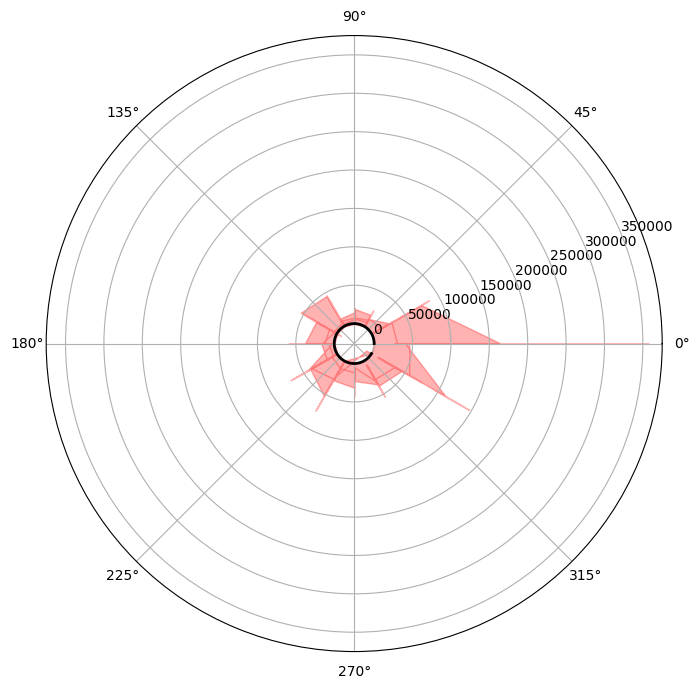

In [20]:
# Convert dates to numeric time indices
months_since_start = (date.dt.year - 2020) * 12 + (date.dt.month - 1)

# Convert time to angles (one full cycle = 12 months)
df['theta'] = 2 * np.pi * (months_since_start % 12) / 12  

# Spiral radius increases over time
df['r'] = months_since_start / 12.0  

df["bottom"] = df['r']
df['top'] = df['r'] + df['new_confirmed']/4

theta_smooth = np.linspace(0, df["theta"].max(), 500)
r_smooth = np.linspace(0, df["r"].max(), 500)

# Create a polar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})


ax.plot(theta_smooth, r_smooth, color='black', linewidth=2, linestyle='solid')
ax.fill_between(df["theta"], df["bottom"], df["top"], color="red", alpha=0.3, edgecolor="red", linewidth=1)


In [15]:
df

,date,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested
0,2020-01-13,0,0,0,0,0,0,0,0
1,2020-01-14,0,0,0,0,0,0,0,0
2,2020-01-15,0,0,0,0,0,0,0,0
3,2020-01-16,0,0,0,0,0,0,0,0
4,2020-01-17,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
973,2022-09-12,87513,569,0,0,95105036,1046733,0,0
974,2022-09-13,61642,522,0,0,95166678,1047255,0,0
975,2022-09-14,115724,985,0,0,95282402,1048240,0,0
976,2022-09-15,94168,756,0,0,95376570,1048996,0,0
